## Import data

In [10]:
%matplotlib inline
%reload_ext autoreload
from rtxlib.rtx_run import setup_database, db
from analysis_lib.one_sample_tests import KolmogorovSmirnov
from factorial_anova_analysis import get_raw_data

knob_names = [
    "route_random_sigma",
    "exploration_percentage",
    "max_speed_and_length_factor",
    "average_edge_duration_factor",
    "freshness_update_factor",
    "freshness_cut_off_value",
    "re_route_every_ticks",
]

knob_values = [
    [0, 0.3],     # route_random_sigma
    [0, 0.3],     # exploration_percentage
    [1, 2.5],     # max_speed_and_length_factor
    [1, 2.5],     # average_edge_duration_factor
    [5, 20],      # freshness_update_factor
    [100, 700],   # freshness_cut_off_value
    [10, 70]      # re_route_every_ticks"
]

index = "rtxfactorial1" # cars: 750, smart cars: 750, no pendulum (= rtx50)

results = get_raw_data(index, False, 1000)

res = {}
data = {}
knobs = {}

print "~~~~~~~~~"
print index
print "~~~~~~~~~"
for j in range(len(knob_names)): 
    knob_name = knob_names[j]
    print knob_name 
    print "---------"
    for i in knob_values[j]:    
        print "*******"
        res = [r for r in results if r[1].get(knob_name)==i]
#         ind = str(j) + ":" + str(i)
        ind = knob_name + ":" + str(i)
        
        data[ind] = [r[0] for r in res]
        knobs[ind] = [i for r in res]
                
        print str(i)+"'s: " + str(len(data[ind]))
    print "========="

data retrieved from file rtxfactorial1-1000.pickle
~~~~~~~~~
rtxfactorial1
~~~~~~~~~
route_random_sigma
---------
*******
0's: 64000
*******
0.3's: 64000
exploration_percentage
---------
*******
0's: 64000
*******
0.3's: 64000
max_speed_and_length_factor
---------
*******
1's: 64000
*******
2.5's: 64000
average_edge_duration_factor
---------
*******
1's: 64000
*******
2.5's: 64000
freshness_update_factor
---------
*******
5's: 64000
*******
20's: 64000
freshness_cut_off_value
---------
*******
100's: 64000
*******
700's: 64000
re_route_every_ticks
---------
*******
10's: 64000
*******
70's: 64000


## Interaction plot

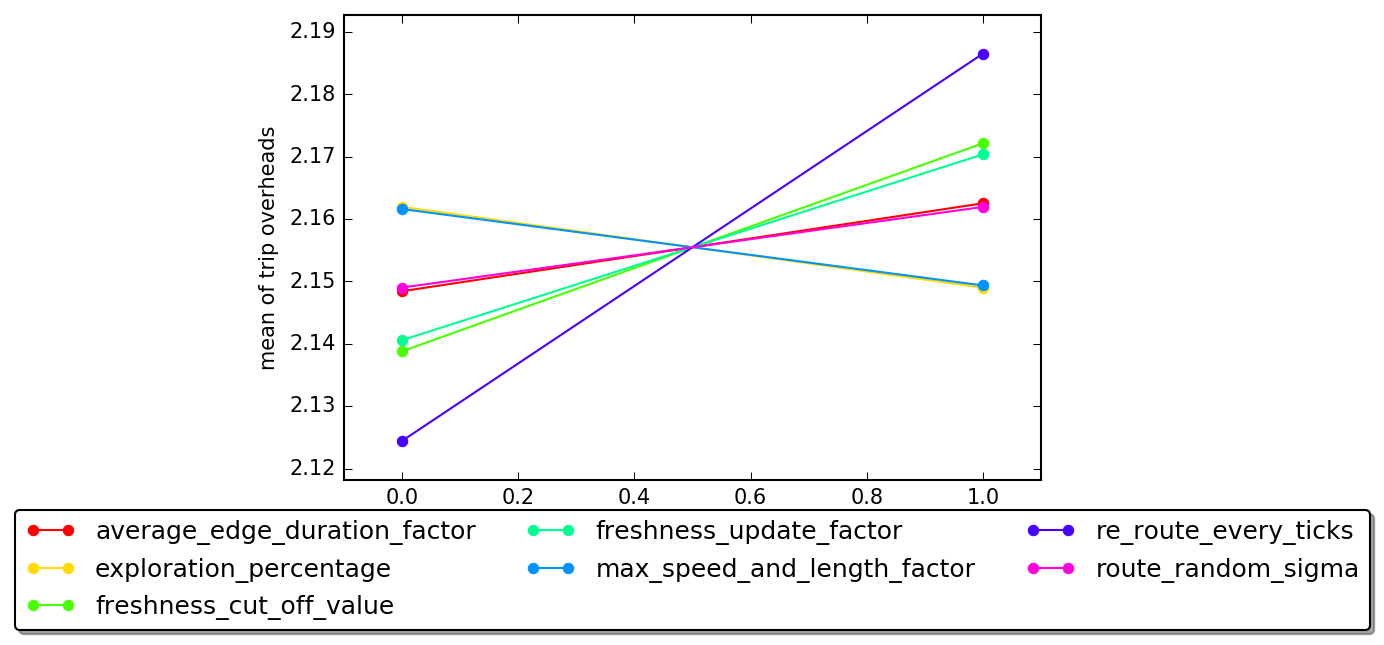

In [18]:
from statsmodels.graphics.factorplots import interaction_plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("savefig", dpi=150)

def get_normalized_list(knob_list):
    l = []
    for knob_v in knob_list: 
        if knob_v == 0:
            l.append(0)
        if knob_v == 1:
            l.append(0)
        if knob_v == 5:
            l.append(0)
        if knob_v == 10:
            l.append(0)
        if knob_v == 100:
            l.append(0)
        if knob_v == 0.3:
            l.append(1)
        if knob_v == 2.5:
            l.append(1)
        if knob_v == 20:
            l.append(1)
        if knob_v == 70:
            l.append(1)
        if knob_v == 700:
            l.append(1)
    return l

all_knobs = []
for knob_list in knobs.values():
    all_knobs += get_normalized_list(knob_list)
    
all_traces = []
for k in knobs.keys():
    all_traces += [k.split(":")[0] for i in range(len(knobs[k]))]

all_data = []
for data_list in data.values():
    all_data += [d["overhead"] for d in data_list]

fig = interaction_plot(all_knobs, all_traces, all_data, ms=10)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.35), ncol=3, fancybox=True, shadow=True)
plt.ylabel('mean of trip overheads')
plt.show()

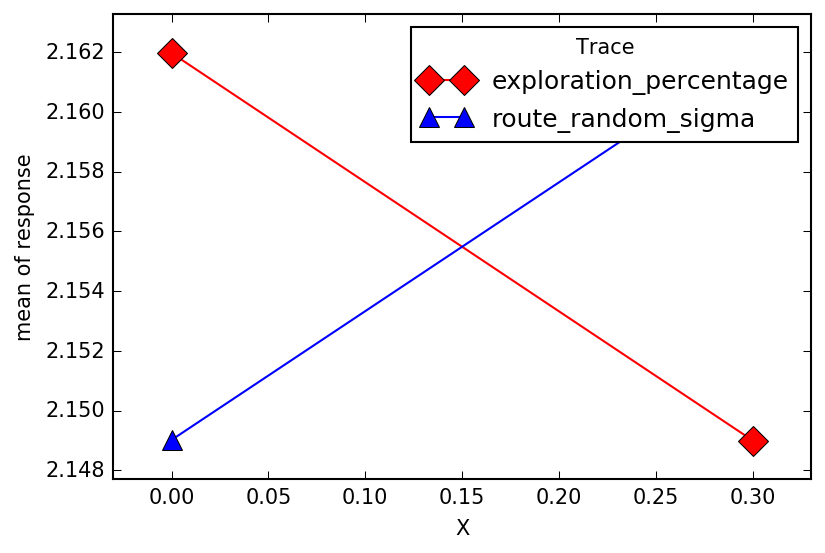

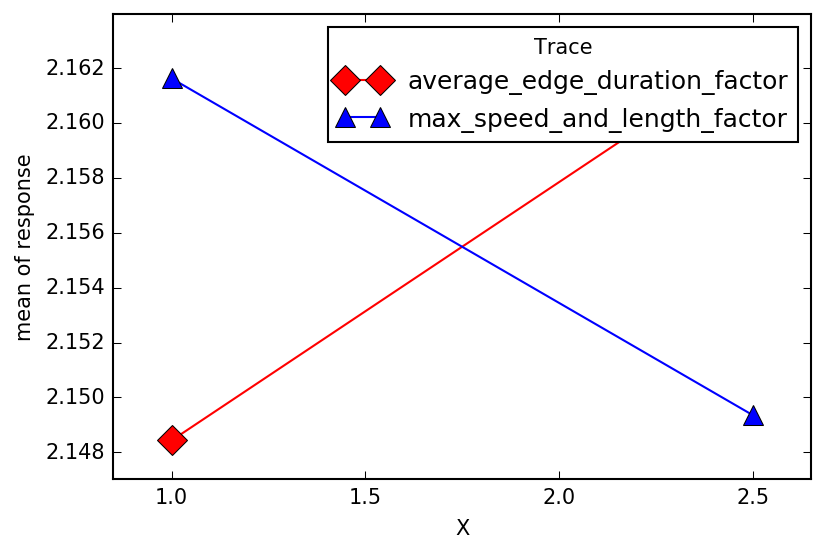

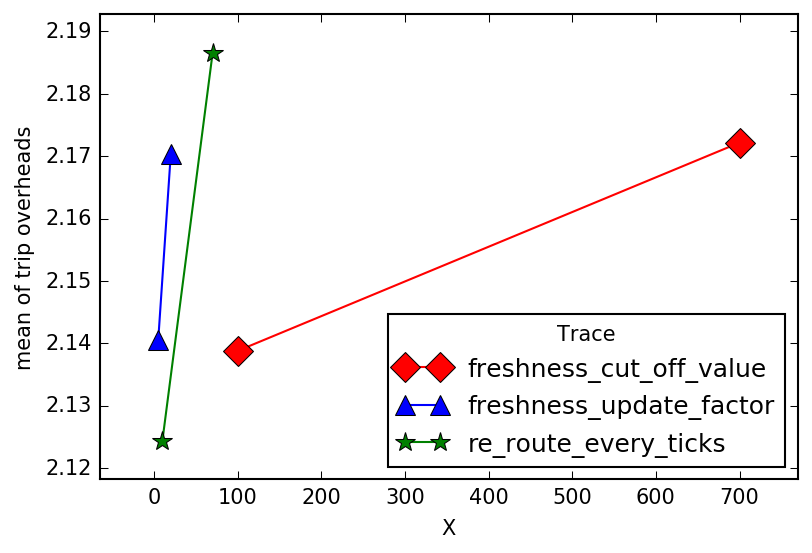

In [6]:
recreated_knobs = {}
recreated_data = {}

for i in range(len(knob_names)):
    recreated_knobs[i] = []
    recreated_data[i] = []
    
for k, knob_list in knobs.iteritems():
    conf_id = int(k.split("_")[0])
    recreated_knobs[conf_id] += knob_list

for k, data_list in data.iteritems():
    conf_id = int(k.split("_")[0])
    recreated_data[conf_id] += [d["overhead"] for d in data_list]

all_knobs = recreated_knobs[0] + recreated_knobs[1]
all_traces = [knob_names[0] for _ in range(len(recreated_knobs[0]))] + \
    [knob_names[1] for _ in range(len(recreated_knobs[1]))]
all_data = recreated_data[0] + recreated_data[1]

fig = interaction_plot(all_knobs, all_traces, all_data, colors=['red','blue'], markers=['D','^'], ms=10)
plt.show()

all_knobs = recreated_knobs[2] + recreated_knobs[3]
all_traces = [knob_names[2] for _ in range(len(recreated_knobs[2]))] + \
            [knob_names[3] for _ in range(len(recreated_knobs[3]))]
all_data = recreated_data[2] + recreated_data[3]

fig = interaction_plot(all_knobs, all_traces, all_data, colors=['red','blue'], markers=['D','^'], ms=10)
plt.show()

all_knobs = recreated_knobs[4] + recreated_knobs[5] + recreated_knobs[6]
all_traces = [knob_names[4] for _ in range(len(recreated_knobs[4]))] + \
            [knob_names[5] for _ in range(len(recreated_knobs[5]))] + \
            [knob_names[6] for _ in range(len(recreated_knobs[6]))]
all_data = recreated_data[4] + recreated_data[5] + recreated_data[6]

fig = interaction_plot(all_knobs, all_traces, all_data, colors=['red','blue', 'green'], markers=['D','^', '*'], ms=10)
plt.ylabel('mean of trip overheads')
plt.show()


### Some experiments

[1 2 2 2 1 2 1 1 2 1 2 2 1 2 2 1 2 2 2 1 1 1 2 2 2 1 2 1 1 2 2 2 2 2 1 2 2
 2 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 2 2 2 1 2 2 1]
[2 3 1 2 1 3 1 3 1 1 2 3 1 3 1 1 3 2 3 3 3 2 3 3 2 2 1 3 1 2 3 3 3 1 1 3 3
 2 1 1 2 1 3 3 2 2 1 2 1 3 2 3 1 2 2 2 3 1 1 3]
[ 1.79175947  3.36729583  3.13549422  1.79175947  2.30258509  2.56494936
  1.94591015  0.69314718  2.7080502   3.25809654  2.48490665  3.09104245
  0.          2.63905733  2.19722458  2.19722458  2.94443898  2.77258872
  2.77258872  3.29583687  0.          2.56494936  2.94443898  0.
  3.13549422  1.79175947  2.99573227  2.77258872  1.09861229  3.36729583
  2.07944154  1.60943791  2.07944154  2.94443898  1.38629436  3.13549422
  0.          3.09104245  2.63905733  3.04452244  0.69314718  3.25809654
  2.56494936  1.79175947  2.89037176  1.09861229  2.99573227  3.21887582
  2.83321334  2.30258509  1.38629436  1.79175947  2.99573227  3.21887582
  2.63905733  2.30258509  2.7080502   2.99573227  2.39789527  2.7080502 ]


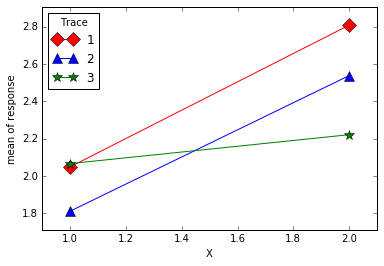

In [18]:
from statsmodels.graphics.factorplots import interaction_plot
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)
weight = np.random.randint(1,3,size=60)
duration = np.random.randint(1,4,size=60)
days = np.log(np.random.randint(1,30, size=60))

print weight
print duration
print days 

fig = interaction_plot(weight, duration, days, colors=['red','blue', 'green'], markers=['D','^', '*'], ms=10)

plt.show()
    
# fig = interaction_plot(data.dose, data.supp, data.len, colors=['red','blue'], markers=['D','^'], ms=10)
# fig = interaction_plot(data.dose, data.supp, data.len, ms=10)

[0, 0, 0, 0.3, 0.3, 0.3, 1, 1, 1, 2.5, 2.5, 2.5]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[ 1.94591015  2.07944154  2.48490665  2.07944154  3.17805383  3.21887582
  3.17805383  0.69314718  3.33220451  3.17805383  1.60943791  0.        ]


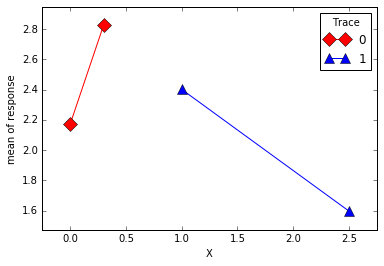

In [25]:
from statsmodels.graphics.factorplots import interaction_plot
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(12345)
weight = [0, 0, 0, 0.3, 0.3, 0.3, 1, 1, 1, 2.5, 2.5, 2.5]
duration = [0 for i in range(6)] + [1 for i in range(6)]
days = np.log(np.random.randint(1,30, size=12))

print weight
print duration
print days 

fig = interaction_plot(weight, duration, days, colors=['red','blue'], markers=['D','^'], ms=10)

plt.show()